In [15]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
import torch.optim as optim

from sklearn.model_selection import train_test_split

(20000, 1, 28, 28) float32
(20000,) int64
(2000, 1, 28, 28) float32


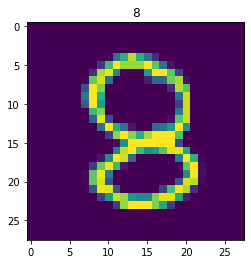

In [0]:
with np.load('prediction-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER
# 2. INDEX: COLOR CHANNEL
# 3/4. INDEX: PIXEL VALUE
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

# TEST DATA: INPUT (x) ONLY
print(test_x.shape, test_x.dtype)


plt.imshow(data_x[0, 0])
plt.title(data_y[0])
plt.show()

In [0]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.1)

In [0]:
BATCH_SIZE = 20

torch_X_train = torch.from_numpy(X_train)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor)

torch_X_val = torch.from_numpy(X_val)
torch_y_val = torch.from_numpy(y_val).type(torch.LongTensor)

train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
validate = torch.utils.data.TensorDataset(torch_X_val,torch_y_val)

train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
val_loader = torch.utils.data.DataLoader(validate, batch_size = BATCH_SIZE, shuffle = False)

# 3 hidden layers

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1) 

net = Net()
print(net)  

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

net.train() # prep model for training

for epoch in range(5): # cross validation
    for data in train_loader:  
        X, y = data  
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = loss_criterion(output, y)  
        loss.backward()  
        optimizer.step()  
    print(loss) 

tensor(0.1577, grad_fn=<NllLossBackward>)
tensor(0.4224, grad_fn=<NllLossBackward>)
tensor(0.4056, grad_fn=<NllLossBackward>)
tensor(0.3843, grad_fn=<NllLossBackward>)
tensor(0.7803, grad_fn=<NllLossBackward>)


In [0]:
correct = 0
total = 0

with torch.no_grad():
    for data in val_loader:
        X, y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          total += 1

print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.88


# 4 hidden layers

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) 

net = Net()
print(net)  

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

net.train() # prep model for training

for epoch in range(5): # cross validation
    for data in train_loader:  
        X, y = data  
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = loss_criterion(output, y)  
        loss.backward()  
        optimizer.step()  
    print(loss) 

tensor(0.3502, grad_fn=<NllLossBackward>)
tensor(0.2833, grad_fn=<NllLossBackward>)
tensor(0.1229, grad_fn=<NllLossBackward>)
tensor(0.2129, grad_fn=<NllLossBackward>)
tensor(0.0311, grad_fn=<NllLossBackward>)


In [0]:
correct = 0
total = 0

with torch.no_grad():
    for data in val_loader:
        X, y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.901


In [0]:
import numpy as np

prediction = net(torch.from_numpy(test_x).view(-1,784))

prediction_numpy = prediction.cpu().detach().numpy()

final_prediction = prediction_numpy.argmax(axis=1)

print(final_prediction.shape)
print(final_prediction.ndim)



# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert final_prediction.ndim == 1
assert final_prediction.shape[0] == 2000

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('prediction.npy', final_prediction)

(2000,)
1


# 5 hidden layers

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1) 

net = Net()
print(net)  

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

net.train() # prep model for training

for epoch in range(5): # cross validation
    for data in train_loader:  
        X, y = data  
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = loss_criterion(output, y)  
        loss.backward()  
        optimizer.step()  
    print(loss) 

tensor(0.4084, grad_fn=<NllLossBackward>)
tensor(0.3104, grad_fn=<NllLossBackward>)
tensor(0.4893, grad_fn=<NllLossBackward>)
tensor(0.1612, grad_fn=<NllLossBackward>)
tensor(0.1929, grad_fn=<NllLossBackward>)


In [0]:
correct = 0
total = 0

with torch.no_grad():
    for data in val_loader:
        X, y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.903
